In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def myimshow(I, **kwargs):
    plt.figure();
    plt.axis('off')
    plt.imshow(I,cmap=plt.gray(),**kwargs)

1.5140274631770014e-05

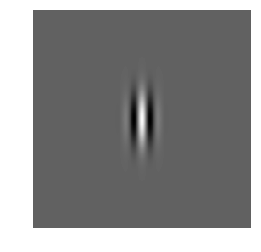

In [20]:
def genGabor(sz, omega, theta, func=np.cos, K=np.pi):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * ( 4 * x1**2 + y1**2))
#     myimshow(gauss)
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
#     myimshow(sinusoid)
    gabor = gauss * sinusoid
    return gabor
        
g = genGabor((256,256), 0.3, np.pi, func=np.cos) 
# change func to "cos", "sin" can generate sin gabor or cos gabor, here we pass a function name as a parameter
myimshow(g)
np.mean(g)



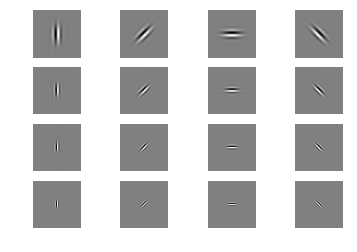

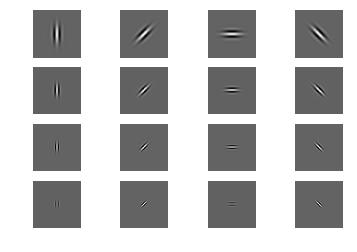

In [21]:
theta = np.arange(0, np.pi, np.pi/4) # range of theta
omega = np.arange(0.2, 0.6, 0.1) # range of omega
params = [(t,o) for o in omega for t in theta]
sinFilterBank = []
cosFilterBank = []
gaborParams = []
for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(256, 256)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

plt.figure()
n = len(sinFilterBank)
for i in range(n):
    plt.subplot(4,4,i+1)
    # title(r'$\theta$={theta:.2f}$\omega$={omega}'.format(**gaborParams[i]))
    plt.axis('off'); plt.imshow(sinFilterBank[i])

plt.figure()
for i in range(n):
    plt.subplot(4,4,i+1)
    # title(r'$\theta$={theta:.2f}$\omega$={omega}'.format(**gaborParams[i]))
    plt.axis('off'); plt.imshow(cosFilterBank[i])

CPU times: user 4min 12s, sys: 2.2 s, total: 4min 14s
Wall time: 4min 20s


<Figure size 432x288 with 0 Axes>

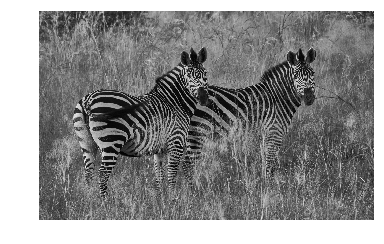

<Figure size 432x288 with 0 Axes>

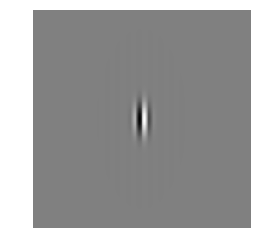

<Figure size 432x288 with 0 Axes>

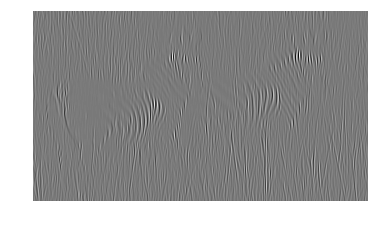

In [22]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
zebra = rgb2gray(plt.imread('zebra.jpg'))
plt.figure(); myimshow(zebra)
sinGabor = sinFilterBank[12] 
plt.figure(); myimshow(sinGabor)
%time res = convolve2d(zebra, sinGabor, mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure



CPU times: user 4min 6s, sys: 1.29 s, total: 4min 7s
Wall time: 4min 9s


<Figure size 432x288 with 0 Axes>

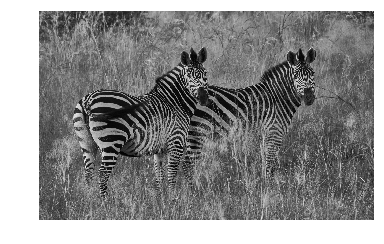

<Figure size 432x288 with 0 Axes>

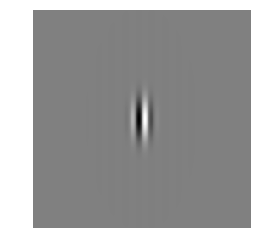

<Figure size 432x288 with 0 Axes>

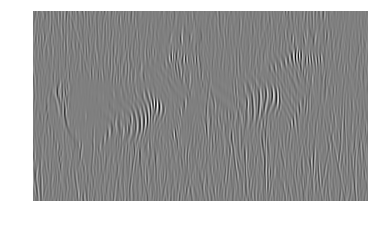

In [23]:
plt.figure(); myimshow(zebra)
sinGabor = sinFilterBank[8] 
plt.figure(); myimshow(sinGabor)
%time res = convolve2d(zebra, sinGabor, mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure

CPU times: user 4min 3s, sys: 767 ms, total: 4min 3s
Wall time: 4min 4s


<Figure size 432x288 with 0 Axes>

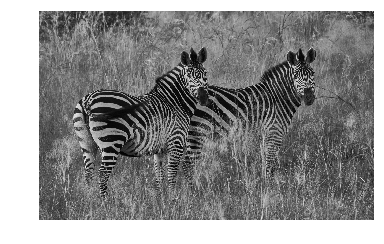

<Figure size 432x288 with 0 Axes>

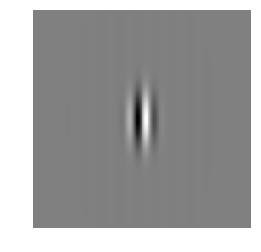

<Figure size 432x288 with 0 Axes>

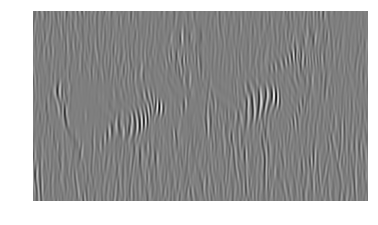

In [24]:
plt.figure(); myimshow(zebra)
sinGabor = sinFilterBank[4] 
plt.figure(); myimshow(sinGabor)
%time res = convolve2d(zebra, sinGabor, mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure